In [37]:
# Import libraries and magics
%matplotlib inline
%pylab inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
sns.set()

Populating the interactive namespace from numpy and matplotlib


# Capstone Project 1: Exploratory Data Analysis

## Introduction

After looking at the data story, it appears that there might be a correlation between some of the features in the dataset and individuals who default. In order to be sure, I need to perform some statistical tests to see which, if any, features actually correlate to default rates. 

I've decided to focus on the following features to see if they are correlated to the default rates:
* Funded Amount
* Employment Length
* Home Ownership
* Annual Income
* Date Loan was Issued
* Purpose of Loan
* Title of Loan
* State of Residence
* Debt to Income ratio 

**Links**

* Link to dataset: https://resources.lendingclub.com/LoanStats3a.csv.zip
* Link to data wrangling process: https://goo.gl/vSfcwL
* Link to data story: https://goo.gl/LeYn87

In [38]:
# Import dataframe
df = pd.read_csv('loan_clean.csv', header = 0, index_col = 0)

In [39]:
# Examine dataframe
df.head()

,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,issue_year,issue_month
0,5000.0,36 months,0.1065,162.87,B,B2,Unknown,10+ years,RENT,24000.0,Verified,2011-12-01,0,credit_card,Other,AZ,27.65,11,Dec
1,2500.0,60 months,0.1527,59.83,C,C4,Other,< 1 year,RENT,30000.0,Source Verified,2011-12-01,1,car,Other,GA,1.00,11,Dec
2,2400.0,36 months,0.1596,84.33,C,C5,Unknown,10+ years,RENT,12252.0,Not Verified,2011-12-01,0,small_business,Other,IL,8.72,11,Dec
3,10000.0,36 months,0.1349,339.31,C,C1,Other,10+ years,RENT,49200.0,Source Verified,2011-12-01,0,other,Other,CA,20.00,11,Dec
4,3000.0,60 months,0.1269,67.79,B,B5,Other,1 year,RENT,80000.0,Source Verified,2011-12-01,0,other,Personal,OR,17.94,11,Dec


## Current Loan Status

As a reminder, every loan in the Lending Tree dataset has two different categories: 
- Fully Paid: the loan is currently up to date with all payments and is in good standing
- Charged Off: the loan is in default and is not expected to be paid off by the borrower 

For purposes of the data exploration and analysis, I will be assigning the categories as follows: 
- Fully Paid: 0
- Charged Off: 1

In [40]:
print('Number of Loans that are Fully Paid (0) or Charged Off (1):')
df.loan_status.value_counts()

Number of Loans that are Fully Paid (0) or Charged Off (1):


0    36104
1     6431
Name: loan_status, dtype: int64

In [62]:
a = 6431/(36104+6431)*100
print('Percentage of loans that are in default:') 
print(round(a,2))

Percentage of loans that are in default:
15.12


## Funded Amount 

**H0**: There is no difference between default rates for the amount funded per loan <br>
**H1**: There is a difference between default rates for the amount funded per loan

,funded_amnt
loan_status,
0,10702.134805
1,11492.190173


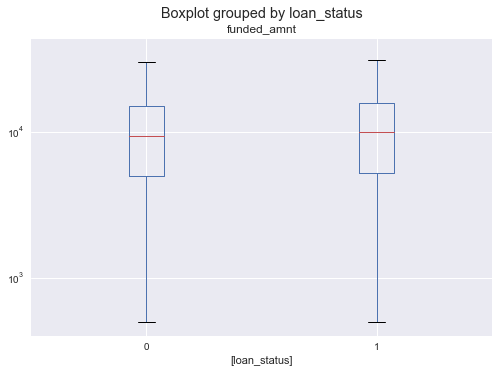

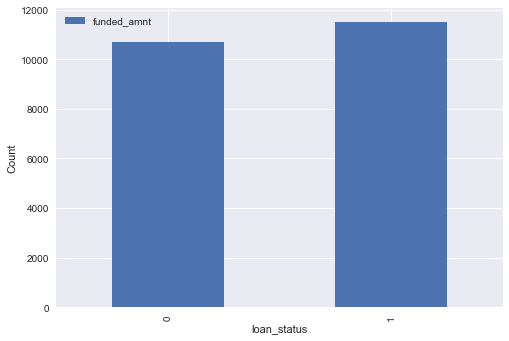

In [42]:
# Create a box plot of funded_amnt and loan_status
df.boxplot(column=['funded_amnt'],by = ['loan_status']).set_yscale('log')
pd.DataFrame(df.groupby( ['loan_status'])['funded_amnt'].describe().loc[:,['mean','std']])

# Compare the ratio for funded_amnt and loan_status
df.groupby(['loan_status'])[['funded_amnt']].mean().plot(kind='bar').set_ylabel('Count')
df.groupby(['loan_status' ])[['funded_amnt']].mean()

In [43]:
# Perform a t-test on funded_amnt
val1 = df.funded_amnt[df.loan_status == 0]
val2 = df.funded_amnt[df.loan_status == 1]
stats.ttest_ind(val1, val2)

Ttest_indResult(statistic=-8.1736933651248265, pvalue=3.0727095710409249e-16)

The p-value is below 0.05 so I can reject the null hypothesis.

## Employment Length

**H0**: There is no difference between default rates and a borrower's length of employment<br>
**H1**: There is a difference between default rates and  borrower's length of employment

In [58]:
df_ind = pd.get_dummies(df['emp_length'])
df_ind['intercept'] = 1
df_ind['loan_status'] = df.loan_status

logit = sm.Logit(df_ind['loan_status'], df_ind [['1 year', '10+ years', '2 years','3 years','4 years','intercept']] )

result = logit.fit() 
result.summary()

Optimization terminated successfully.
         Current function value: 0.424087
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                42535
Model:                          Logit   Df Residuals:                    42523
Method:                           MLE   Df Model:                           11
Date:                Tue, 17 Jul 2018   Pseudo R-squ.:                0.001616
Time:                        19:05:15   Log-Likelihood:                -18039.
converged:                       True   LL-Null:                       -18068.
                                        LLR p-value:                 1.830e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
1 year        -0.4454      0.086     -5.185      0.000      -0.614      -0.277
10+ years     -0.3905      0.078     -5.030      0.000      -0.543      -0.238
2 years       -0.5692      0.084     -6.799      0.000      -0.733      -0.405
3 years       -0.5157      0.084     -6.125      0.000      -0.681      -0.351
4 years       -0.5264      0.086     -6.090      0.000      -0.696      -0.357
5 years       -0.4930      0.087     -5.678      0.000      -0.663      -0.323
6 years       -0.4849      0.093     -5.238      0.000      -0.666      -0.303
7 years       -0.4144      0.096     -4.307      0.000      -0.603      -0.226
8 years       -0.4748      0.101     -4.707      0.000      -0.672      -0.277
9 years       -0.6003      0.108     -5.561      0.000      -0.812      -0.389
< 1 year      -0.4837      0.082     -5.867      0.000      -0.645      -0.322
intercept     -1.2638      0.072    -17.467      0.000      -1.406      -1.122
==============================================================================
"""

The p-value for length of employment is below 0.05 so I can reject the null hypothesis.

## Home Ownership

**H0**: There is no difference between default rates and a borrower's home ownership status<br>
**H1**: There is a difference between default rates and  borrower's home ownership status

,loan_status
home_ownership,
MORTGAGE,0.142360
NONE,0.125000
OTHER,0.213235
OWN,0.152261
RENT,0.158912


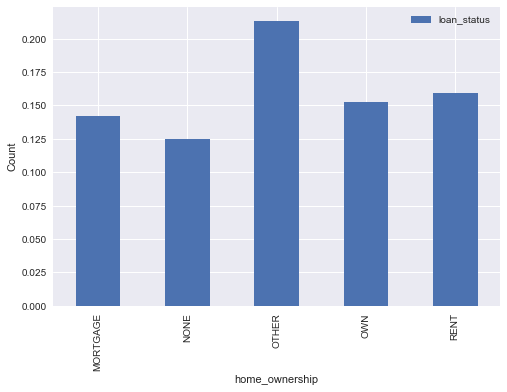

In [45]:
df.groupby(['home_ownership'])[['loan_status']].mean().plot(kind='bar').set_ylabel('Count')
df.groupby(['home_ownership' ])[['loan_status']].mean()

In [59]:
df_ind = pd.get_dummies(df['home_ownership'])
df_ind['intercept'] = 1
df_ind['loan_status'] = df.loan_status

logit = sm.Logit(df_ind['loan_status'], df_ind [['MORTGAGE', 'OTHER', 'OWN', 'RENT', 'intercept']] )
result = logit.fit() 
result.summary()

Optimization terminated successfully.
         Current function value: 0.424482
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                42535
Model:                          Logit   Df Residuals:                    42530
Method:                           MLE   Df Model:                            4
Date:                Tue, 17 Jul 2018   Pseudo R-squ.:               0.0006844
Time:                        19:06:46   Log-Likelihood:                -18055.
converged:                       True   LL-Null:                       -18068.
                                        LLR p-value:                 5.695e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
MORTGAGE       0.1501      1.069      0.140      0.888      -1.946       2.246
OTHER          0.6404      1.089      0.588      0.557      -1.495       2.775
OWN            0.2289      1.070      0.214      0.831      -1.869       2.326
RENT           0.2796      1.069      0.261      0.794      -1.816       2.375
intercept     -1.9459      1.069     -1.820      0.069      -4.041       0.149
==============================================================================
"""

The p-value is below 0.05 so I can reject the null hypothesis.

## Annual Income
**H0**: There is no difference between default rates and a borrower's annual income<br>
**H1**: There is a difference between default rates and  borrower's annual income

,mean,std
loan_status,,
0,70164.277724,66280.247602
1,63366.870530,49684.103432


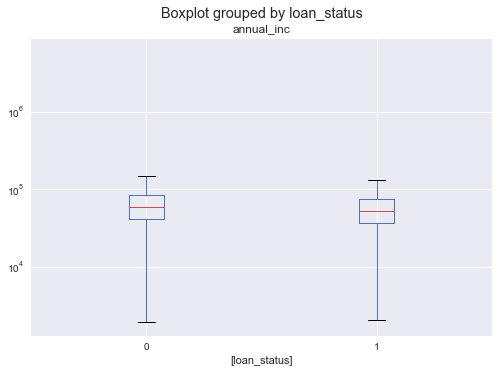

In [54]:
df.boxplot(column=['annual_inc'],by = ['loan_status']).set_yscale('log')
pd.DataFrame(df.groupby( ['loan_status'])['annual_inc'].describe().loc[:,['mean','std']])

In [48]:
val1 = df.annual_inc[df.loan_status == 0]
val2 = df.annual_inc[df.loan_status == 1]
stats.ttest_ind(val1, val2)

Ttest_indResult(statistic=7.841202646289811, pvalue=4.5659583514162483e-15)

The p-value for annual income is below 0.05 so I can reject the null hypothesis

## Issued Month
**H0**: There is no difference between default rates and the month the loan was issued<br>
**H1**: There is a difference between default rates and the month the loan was issued

In [49]:
df_ind = pd.get_dummies(df['issue_month'])
df_ind['intercept'] = 1
df_ind['loan_status'] = df.loan_status

logit = sm.Logit(df_ind['loan_status'], df_ind [['Aug', 'Dec',  'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 
                                                 'Nov', 'Oct', 'Sep','intercept']] )
result = logit.fit() 
result.summary()

Optimization terminated successfully.
         Current function value: 0.424498
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                42535
Model:                          Logit   Df Residuals:                    42523
Method:                           MLE   Df Model:                           11
Date:                Tue, 17 Jul 2018   Pseudo R-squ.:               0.0006478
Time:                        17:53:05   Log-Likelihood:                -18056.
converged:                       True   LL-Null:                       -18068.
                                        LLR p-value:                   0.01547
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Aug           -0.0086      0.070     -0.123      0.902      -0.146       0.129
Dec            0.1426      0.065      2.183      0.029       0.015       0.271
Feb           -0.0685      0.078     -0.884      0.377      -0.221       0.083
Jan            0.0970      0.075      1.295      0.195      -0.050       0.244
Jul            0.0266      0.070      0.381      0.703      -0.110       0.163
Jun            0.1225      0.070      1.762      0.078      -0.014       0.259
Mar            0.0033      0.074      0.045      0.964      -0.141       0.147
May            0.1496      0.071      2.112      0.035       0.011       0.288
Nov            0.1059      0.066      1.597      0.110      -0.024       0.236
Oct            0.1205      0.067      1.799      0.072      -0.011       0.252
Sep            0.1095      0.068      1.607      0.108      -0.024       0.243
intercept     -1.8002      0.052    -34.781      0.000      -1.902      -1.699
==============================================================================
"""

The p-value is 0.02 which is below 0.05 and I can reject the null hypothesis

## Purpose

**H0**: There is no difference between default rates and the purpose of the loan<br>
**H1**: There is a difference between default rates and the purpose of the loan

In [50]:
df_ind = pd.get_dummies(df['purpose'])
df_ind['intercept'] = 1
df_ind['loan_status'] = df['loan_status'] 

df_ind= df_ind.fillna(0) 

logit = sm.Logit(df_ind['loan_status'], df_ind [['credit_card', 'debt_consolidation',  'educational', 
                                                  'home_improvement',  'house',  'major_purchase',  'medical', 
                                                  'moving',  'other',  'renewable_energy', 'small_business', 'vacation',
                                                 'wedding', 'intercept']] )
result = logit.fit() 

result.summary()

Optimization terminated successfully.
         Current function value: 0.420097
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                42535
Model:                          Logit   Df Residuals:                    42521
Method:                           MLE   Df Model:                           13
Date:                Tue, 17 Jul 2018   Pseudo R-squ.:                 0.01101
Time:                        17:53:06   Log-Likelihood:                -17869.
converged:                       True   LL-Null:                       -18068.
                                        LLR p-value:                 6.579e-77
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
credit_card            0.0566      0.091      0.621      0.535      -0.122       0.235
debt_consolidation     0.4318      0.083      5.214      0.000       0.269       0.594
educational            0.7867      0.144      5.451      0.000       0.504       1.070
home_improvement       0.2364      0.096      2.464      0.014       0.048       0.424
house                  0.4941      0.154      3.218      0.001       0.193       0.795
major_purchase        -0.0116      0.105     -0.111      0.912      -0.218       0.194
medical                0.5348      0.126      4.243      0.000       0.288       0.782
moving                 0.5357      0.133      4.022      0.000       0.275       0.797
other                  0.5440      0.090      6.058      0.000       0.368       0.720
renewable_energy       0.6619      0.261      2.536      0.011       0.150       1.173
small_business         1.1591      0.095     12.230      0.000       0.973       1.345
vacation               0.3661      0.162      2.255      0.024       0.048       0.684
wedding                0.0150      0.129      0.116      0.908      -0.239       0.269
intercept             -2.1205      0.080    -26.355      0.000      -2.278      -1.963
======================================================================================
"""

The p-value is below 0.05 so I can reject the null hypothesis

## State of Residence
**H0**: There is no difference between default rates and a borrower's state of residence<br>
**H1**: There is a difference between default rates and a borrower's state of residence

In [51]:
df_ind = pd.get_dummies(df['addr_state'])
df_ind['intercept'] = 1
df_ind['loan_status'] = df['loan_status'] 

df_ind= df_ind.fillna(0) 

logit = sm.Logit(df_ind['loan_status'], df_ind [['AL','AR','AZ','CA','CO','CT','DC','DE','FL','GA','HI','IA','ID',
                                                 'IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','NE',
                                                 'NH','NJ','NM','NV','NY','OH','OK','OR','PA','RI','SC','SD','TN','TX',
                                                 'UT','VA','VT','WA','WI','WV','WY','intercept']] )

result = logit.fit() 

result.summary()

Optimization terminated successfully.
         Current function value: 0.422669
         Iterations 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                42535
Model:                          Logit   Df Residuals:                    42485
Method:                           MLE   Df Model:                           49
Date:                Tue, 17 Jul 2018   Pseudo R-squ.:                0.004953
Time:                        17:53:07   Log-Likelihood:                -17978.
converged:                       True   LL-Null:                       -18068.
                                        LLR p-value:                 1.070e-16
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AL            -0.5170      0.303     -1.706      0.088      -1.111       0.077
AR            -0.4977      0.327     -1.521      0.128      -1.139       0.144
AZ            -0.3083      0.286     -1.079      0.280      -0.868       0.251
CA            -0.2145      0.273     -0.787      0.431      -0.749       0.320
CO            -0.5043      0.289     -1.743      0.081      -1.071       0.063
CT            -0.5009      0.290     -1.727      0.084      -1.070       0.068
DC            -1.0986      0.370     -2.968      0.003      -1.824      -0.373
DE            -0.6140      0.380     -1.617      0.106      -1.358       0.130
FL            -0.0676      0.275     -0.246      0.806      -0.606       0.471
GA            -0.2109      0.279     -0.755      0.450      -0.759       0.337
HI            -0.2152      0.337     -0.639      0.523      -0.875       0.444
IA            -0.2085      0.821     -0.254      0.799      -1.817       1.400
ID            -0.6785      1.095     -0.620      0.535      -2.824       1.467
IL            -0.4148      0.280     -1.482      0.138      -0.963       0.134
IN             0.8619      0.547      1.575      0.115      -0.211       1.935
KS            -0.5839      0.324     -1.803      0.071      -1.219       0.051
KY            -0.3088      0.308     -1.003      0.316      -0.912       0.295
LA            -0.5376      0.305     -1.762      0.078      -1.135       0.060
MA            -0.5120      0.282     -1.816      0.069      -1.065       0.041
MD            -0.2182      0.282     -0.773      0.440      -0.772       0.335
ME          -126.0556   2.74e+27   -4.6e-26      1.000   -5.38e+27    5.38e+27
MI            -0.2987      0.288     -1.037      0.300      -0.863       0.266
MN            -0.4053      0.293     -1.382      0.167      -0.980       0.169
MO            -0.0952      0.286     -0.332      0.740      -0.657       0.466
MS             0.1969      0.539      0.366      0.715      -0.859       1.252
MT            -0.1353      0.381     -0.356      0.722      -0.881       0.610
NC            -0.3196      0.288     -1.112      0.266      -0.883       0.244
NE             1.5832      0.663      2.387      0.017       0.283       2.883
NH            -0.3847      0.341     -1.127      0.260      -1.054       0.284
NJ            -0.2956      0.278     -1.064      0.287      -0.840       0.249
NM            -0.2501      0.331     -0.756      0.450      -0.898       0.398
NV             0.2328      0.289      0.804      0.421      -0.335       0.800
NY            -0.4373      0.275     -1.592      0.111      -0.975       0.101
OH            -0.4919      0.283     -1.740      0.082      -1.046       0.062
OK            -0.4244      0.316     -1.344      0.179      -1.043       0.194
OR            -0.2240      0.298     -0.751      0.452      -0.808       0.360
PA            -0.4456      0.280     -1.591      0.112      -0.995       0.103
RI            -0.5018      0.340     -1.474      0.140      -1.169       0.165
SC

The p-value is below 0.05 so I can reject the null hypothesis

## Debt to Income Ratio
**H0**: There is no difference between default rates and a borrower's debt to income ratio<br>
**H1**: There is a difference between default rates and a borrower's debt to income ratio

,mean,std
loan_status,,
0,13.253252,6.731947
1,14.045559,6.655208


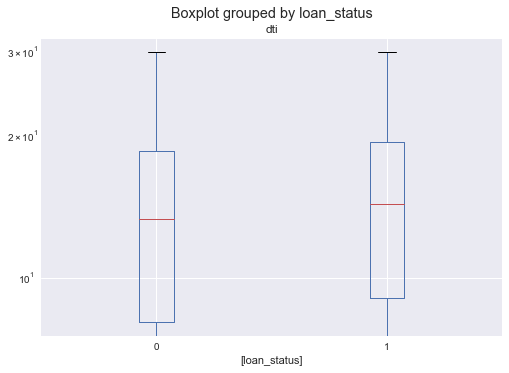

In [52]:
df.boxplot(column=['dti'],by = ['loan_status']).set_yscale('log')
pd.DataFrame(df.groupby( ['loan_status'])['dti'].describe().loc[:,['mean','std']])

In [53]:
val1 = df.dti[df.loan_status == 0]
val2 = df.dti[df.loan_status == 1]
stats.ttest_ind(val1, val2)

Ttest_indResult(statistic=-8.7104794877852409, pvalue=3.1327064696533274e-18)

The p-value is below 0.05 so I can reject the null hypothesis.

## Conclusions

All features appear to significantly correlate to the default status of a loan. I will further examine this relationship during the machina learning unit. 